In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
# loading the dataset 
df=pd.read_csv('scraped_flight_price.csv')

In [38]:
df.head()

,Unnamed: 0,Airline,Dept_City,Arr_City,Departure,Dep_date,Arrival,Duration,Stops,Price
0,0,Air Asia,Kolkata,Mumbai,20:00,"Fri, 25 Feb",06:35,10:35,1stop,7957
1,1,SpiceJet,Kolkata,Mumbai,09:35,"Fri, 25 Feb",12:20,2:45,non-stop,7958
2,2,SpiceJet,Kolkata,Mumbai,21:55,"Fri, 25 Feb",00:45,2:50,non-stop,7958
3,3,SpiceJet,Kolkata,Mumbai,21:55,"Fri, 25 Feb",08:40,10:45,1stop,7958
4,4,SpiceJet,Kolkata,Mumbai,21:55,"Fri, 25 Feb",09:35,11:40,1stop,7958


In [209]:
df.shape

(6275, 10)

# Data Preprocessing

In [39]:
#droping the unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [40]:
df.head()

,Airline,Dept_City,Arr_City,Departure,Dep_date,Arrival,Duration,Stops,Price
0,Air Asia,Kolkata,Mumbai,20:00,"Fri, 25 Feb",06:35,10:35,1stop,7957
1,SpiceJet,Kolkata,Mumbai,09:35,"Fri, 25 Feb",12:20,2:45,non-stop,7958
2,SpiceJet,Kolkata,Mumbai,21:55,"Fri, 25 Feb",00:45,2:50,non-stop,7958
3,SpiceJet,Kolkata,Mumbai,21:55,"Fri, 25 Feb",08:40,10:45,1stop,7958
4,SpiceJet,Kolkata,Mumbai,21:55,"Fri, 25 Feb",09:35,11:40,1stop,7958


In [41]:
# checking the null value
df.isnull().sum()

Airline      0
Dept_City    0
Arr_City     0
Departure    0
Dep_date     0
Arrival      0
Duration     0
Stops        0
Price        0
dtype: int64

There is no null data 

In [42]:
#extracted features from date of journey
df[['Day','DOJ']]=df['Dep_date'].str.split(',',expand=True)

In [43]:
df.head()

,Airline,Dept_City,Arr_City,Departure,Dep_date,Arrival,Duration,Stops,Price,Day,DOJ
0,Air Asia,Kolkata,Mumbai,20:00,"Fri, 25 Feb",06:35,10:35,1stop,7957,Fri,25 Feb
1,SpiceJet,Kolkata,Mumbai,09:35,"Fri, 25 Feb",12:20,2:45,non-stop,7958,Fri,25 Feb
2,SpiceJet,Kolkata,Mumbai,21:55,"Fri, 25 Feb",00:45,2:50,non-stop,7958,Fri,25 Feb
3,SpiceJet,Kolkata,Mumbai,21:55,"Fri, 25 Feb",08:40,10:45,1stop,7958,Fri,25 Feb
4,SpiceJet,Kolkata,Mumbai,21:55,"Fri, 25 Feb",09:35,11:40,1stop,7958,Fri,25 Feb


In [44]:
#dropped the column after feature extraction
df.drop('Dep_date',axis=1,inplace=True)

In [45]:
df['DOJ'].value_counts()

 05 Mar    3433
 25 Feb    2427
 28 Mar     415
Name: DOJ, dtype: int64

In [46]:
df['DOJ']

0        25 Feb
1        25 Feb
2        25 Feb
3        25 Feb
4        25 Feb
         ...   
6270     28 Mar
6271     28 Mar
6272     28 Mar
6273     28 Mar
6274     28 Mar
Name: DOJ, Length: 6275, dtype: object

In [47]:
df1=df[df['DOJ']==' 28 Mar']

In [48]:
df1['Dept_City'].value_counts()

Chennai      153
Bangalore    148
Ahmedabad    114
Name: Dept_City, dtype: int64

In [49]:
df1['Arr_City'].value_counts()

New Delhi      168
Kolkata         84
Mumbai          72
Bhubaneswar     64
Jaipur          27
Name: Arr_City, dtype: int64

In [61]:
#creating column from duration after converting into minute
df['Duration_mnt']=df['Duration'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [62]:
df.drop('Duration',axis=1,inplace=True)

In [63]:
# extracting the only minutes 
df['Departure']=df.Departure.str.split(':').str[0]
df['Arrival']=df.Arrival.str.split(':').str[0]

In [64]:
df[['Departure','Arrival']]=df[['Departure','Arrival']].apply(pd.to_numeric)

In [65]:
def set_timing(x):
    if (x > 4) and (x <=8):
        return 'Early Morning'
    elif (x > 8) and (x <=12):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return 'Noon'
    elif (x >16) and (x <= 20):
        return 'Eve'
    elif (x >20) and (x <=24):
        return 'Night'
    elif (x <= 4):
        return 'Late Night'

In [66]:
df['Departure']=df['Departure'].apply(set_timing)
df['Arrival']=df['Arrival'].apply(set_timing)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       6275 non-null   object
 1   Dept_City     6275 non-null   object
 2   Arr_City      6275 non-null   object
 3   Departure     6275 non-null   object
 4   Arrival       6275 non-null   object
 5   Stops         6275 non-null   object
 6   Price         6275 non-null   int64 
 7   Day           6275 non-null   object
 8   DOJ           6275 non-null   object
 9   Duration_mnt  6275 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 490.4+ KB


In [68]:
df.head()

,Airline,Dept_City,Arr_City,Departure,Arrival,Stops,Price,Day,DOJ,Duration_mnt
0,Air Asia,Kolkata,Mumbai,Eve,Early Morning,1stop,7957,Fri,25 Feb,635
1,SpiceJet,Kolkata,Mumbai,Morning,Morning,non-stop,7958,Fri,25 Feb,165
2,SpiceJet,Kolkata,Mumbai,Night,Late Night,non-stop,7958,Fri,25 Feb,170
3,SpiceJet,Kolkata,Mumbai,Night,Early Morning,1stop,7958,Fri,25 Feb,645
4,SpiceJet,Kolkata,Mumbai,Night,Morning,1stop,7958,Fri,25 Feb,700


# EDA

## Univariate Analysis

[Text(0, 0, 'Kolkata'),
 Text(1, 0, 'New Delhi'),
 Text(2, 0, 'Mumbai'),
 Text(3, 0, 'Chennai'),
 Text(4, 0, 'Bangalore'),
 Text(5, 0, 'Hyderabad'),
 Text(6, 0, 'Bhubaneswar'),
 Text(7, 0, 'Ahmedabad')]

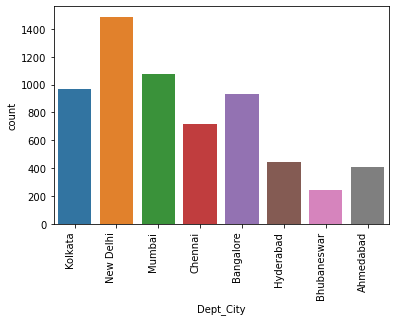

In [72]:
chart=sns.countplot(x='Dept_City',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

- Number of flights are maximum from  New Delhi
- Mumbai is in second position
- Bhubaneswar has comparatively less number of flight 


[Text(0, 0, 'Air Asia'),
 Text(1, 0, 'SpiceJet'),
 Text(2, 0, 'Air India'),
 Text(3, 0, 'GO FIRST'),
 Text(4, 0, 'IndiGo'),
 Text(5, 0, 'Vistara'),
 Text(6, 0, 'Trujet')]

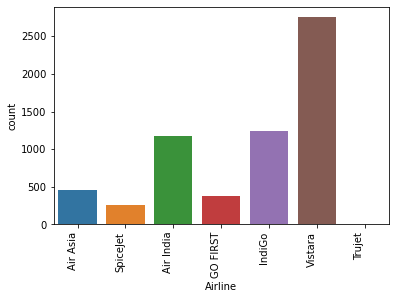

In [73]:
chart=sns.countplot(x='Airline',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

As per collected data through web scraping the followin observation 
found against the air lines:
    - Vistara Airlines provides more number of services from 
    cosidedred cities
    - Indigo is in next position to provide number of flight services 

<AxesSubplot:xlabel='Departure', ylabel='count'>

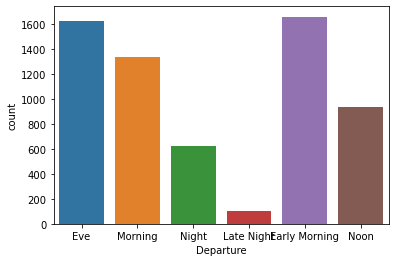

In [74]:
sns.countplot(x='Departure',data=df)


- Most of the flight departure timing is at Early Morning or Evening

- Very flights depart at Late Night 

<AxesSubplot:xlabel='Arrival', ylabel='count'>

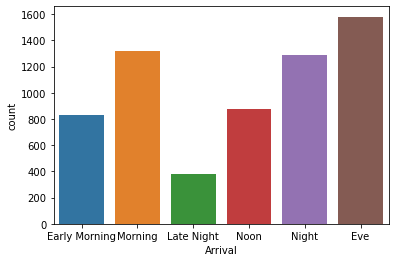

In [75]:
sns.countplot(x='Arrival',data=df)

- Most of the flight arrive at Eve, morning and night

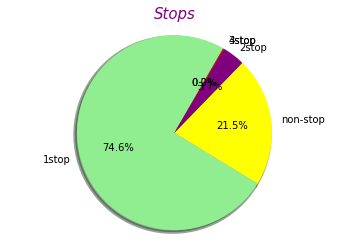

In [77]:
plt.pie(x=df['Stops'].value_counts(),labels=df['Stops'].value_counts().index,
            data=df,shadow=True,startangle=60,autopct='%1.1f%%',colors=['lightgreen','yellow','purple','red'],
       wedgeprops={'linewidth':3.5})
plt.setp(plt.title('Stops',fontsize=15),color='purple',style='italic')
plt.axis('equal')
plt.show()

- 74% of fligts are with 1 stop
- 21.5% are non-stop

In [84]:
df['DOJ'].value_counts()

 05 Mar    3433
 25 Feb    2427
 28 Mar     415
Name: DOJ, dtype: int64

In [95]:
df1['Dept_City'].value_counts()


Chennai      153
Bangalore    148
Ahmedabad    114
Name: Dept_City, dtype: int64

In [100]:
df1['Arr_City'].value_counts()

New Delhi      168
Kolkata         84
Mumbai          72
Bhubaneswar     64
Jaipur          27
Name: Arr_City, dtype: int64

In [99]:
df2=df[(df['Dept_City']=='Chennai')|(df['Dept_City']=='Bangalore')|(df['Dept_City']=='Ahmedabad') ]

In [104]:
df2=df2[(df2['Arr_City']=='New Delhi')| (df2['Arr_City']=='Kolkata')|(df2['Arr_City']=='Mumbai')|(df2['Arr_City']=='Bhubaneswar')|(df2['Arr_City']=='Jaipur')]

In [106]:
df2['DOJ'].value_counts()

 05 Mar    691
 25 Feb    521
 28 Mar    415
Name: DOJ, dtype: int64

## Bivariate Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

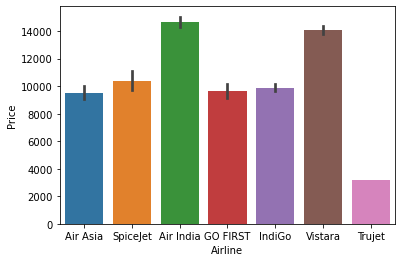

In [112]:
sns.barplot(x='Airline',y='Price',data=df)

-- The most expensive airline in 'Air India'

-- After 'Air India' ,'Vistara' is second expesive airline

-- Rest all airline are average in price

[Text(0, 0, 'Kolkata'),
 Text(1, 0, 'New Delhi'),
 Text(2, 0, 'Mumbai'),
 Text(3, 0, 'Chennai'),
 Text(4, 0, 'Bangalore'),
 Text(5, 0, 'Hyderabad'),
 Text(6, 0, 'Bhubaneswar'),
 Text(7, 0, 'Ahmedabad')]

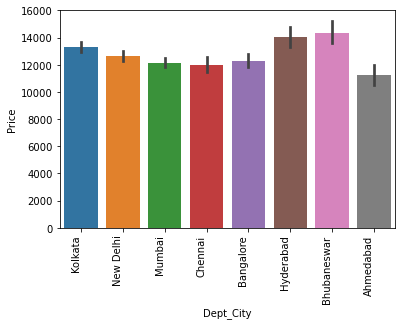

In [115]:
chart=sns.barplot(x='Dept_City',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

Flight from Bhubaneswar the flight price is little higher


[Text(0, 0, 'Mumbai'),
 Text(1, 0, 'New Delhi'),
 Text(2, 0, 'Chennai'),
 Text(3, 0, 'Bangalore'),
 Text(4, 0, 'Hyderabad'),
 Text(5, 0, 'Kolkata'),
 Text(6, 0, 'Goa'),
 Text(7, 0, 'Ahmedabad'),
 Text(8, 0, 'Bhubaneswar'),
 Text(9, 0, 'Jaipur')]

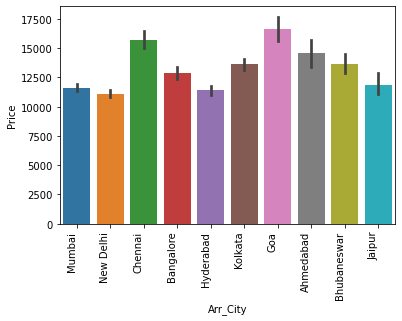

In [116]:
chart=sns.barplot(x='Arr_City',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

Flights which have 'Goa' as destination city has higher ticket price

[Text(0, 0, 'Eve'),
 Text(1, 0, 'Morning'),
 Text(2, 0, 'Night'),
 Text(3, 0, 'Late Night'),
 Text(4, 0, 'Early Morning'),
 Text(5, 0, 'Noon')]

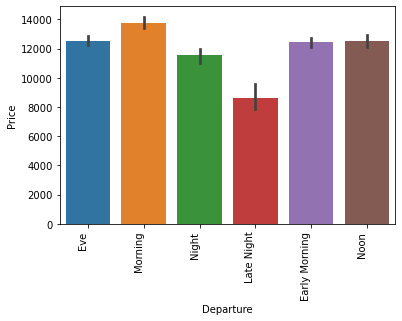

In [117]:
chart=sns.barplot(x='Departure',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

-- Flights which have departure time between 08am to 1159 am the has higher price
 
-- Flights which have departure time between 1200am to 0400 the has lower price


[Text(0, 0, 'Early Morning'),
 Text(1, 0, 'Morning'),
 Text(2, 0, 'Late Night'),
 Text(3, 0, 'Noon'),
 Text(4, 0, 'Night'),
 Text(5, 0, 'Eve')]

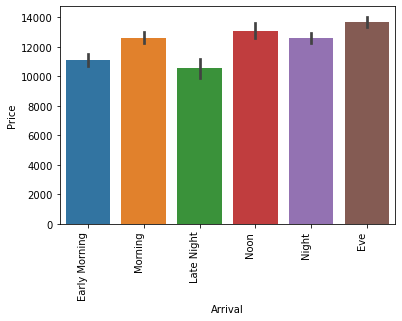

In [119]:
chart=sns.barplot(x='Arrival',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

-- Flights which have arrival time in evening the has higher price
 
-- Flights which have arrival time Late night  the has lower price


[Text(0, 0, '1stop'),
 Text(1, 0, 'non-stop'),
 Text(2, 0, '2stop'),
 Text(3, 0, '3stop'),
 Text(4, 0, '4stop')]

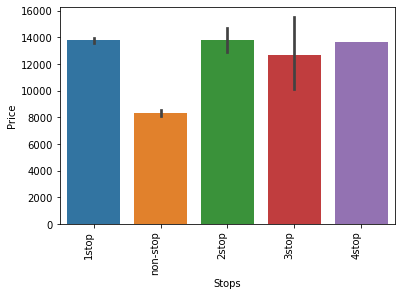

In [120]:
chart=sns.barplot(x='Stops',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

-- Non stop flight from source to destination has lower price

-- Flights which has more than one stop has higher ticket pricer


[Text(0, 0, 'Fri'), Text(1, 0, 'Sat'), Text(2, 0, 'Mon')]

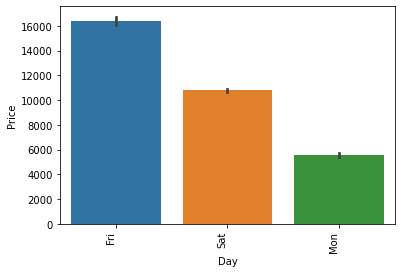

In [122]:
chart=sns.barplot(x='Day',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

Flight which has departure day as 'Friday' has higher price than Saturday of Monday

[Text(-250.0, 0, ''),
 Text(0.0, 0, ''),
 Text(250.0, 0, ''),
 Text(500.0, 0, ''),
 Text(750.0, 0, ''),
 Text(1000.0, 0, ''),
 Text(1250.0, 0, ''),
 Text(1500.0, 0, ''),
 Text(1750.0, 0, ''),
 Text(2000.0, 0, '')]

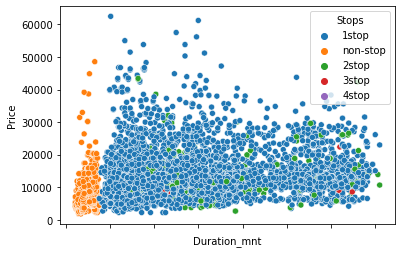

In [124]:
chart=sns.scatterplot(x='Duration_mnt',y='Price',data=df,hue='Stops')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

- The ticket price has increased when the travel duration hase increased

In [125]:
df2.head()

,Airline,Dept_City,Arr_City,Departure,Arrival,Stops,Price,Day,DOJ,Duration_mnt
1454,SpiceJet,Chennai,Kolkata,Early Morning,Early Morning,1stop,5357,Fri,25 Feb,1450
1455,IndiGo,Chennai,Kolkata,Eve,Night,non-stop,7037,Fri,25 Feb,130
1456,IndiGo,Chennai,Kolkata,Eve,Eve,non-stop,7457,Fri,25 Feb,125
1457,IndiGo,Chennai,Kolkata,Noon,Eve,non-stop,7877,Fri,25 Feb,140
1458,IndiGo,Chennai,Kolkata,Early Morning,Morning,non-stop,9032,Fri,25 Feb,145


In [131]:
df2['DOJ']=df2['DOJ'].replace({' 25 Feb':1,' 05 Mar':8,' 28 Mar':31})

<AxesSubplot:xlabel='DOJ', ylabel='Price'>

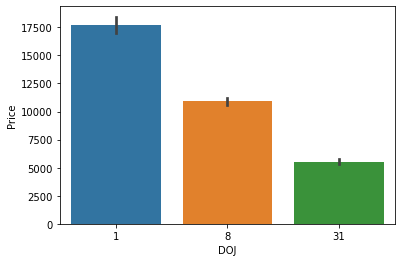

In [132]:
sns.barplot(y='Price',x='DOJ',data=df2)

- Next day flight has high price
- Flights after 8 days has less price
- Flights after 31 days much less price 

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       6275 non-null   object
 1   Dept_City     6275 non-null   object
 2   Arr_City      6275 non-null   object
 3   Departure     6275 non-null   object
 4   Arrival       6275 non-null   object
 5   Stops         6275 non-null   object
 6   Price         6275 non-null   int64 
 7   Day           6275 non-null   object
 8   DOJ           6275 non-null   object
 9   Duration_mnt  6275 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 490.4+ KB


# Data Encoding

In [133]:
df['DOJ']=df['DOJ'].replace({' 25 Feb':1,' 05 Mar':8,' 28 Mar':31})

In [134]:
df["Stops"]=df["Stops"].replace({"non-stop":0,"1stop":1,"2stop":2,"3stop":3,"4stop":4})

In [135]:
df["Departure"]=df["Departure"].replace({"Early Morning":1,"Morning":2,"Noon":3,"Eve":4,"Night":5,"Late Night":6})

In [136]:
df["Arrival"]=df["Arrival"].replace({"Early Morning":1,"Morning":2,"Noon":3,"Eve":4,"Night":5,"Late Night":6})

In [137]:
df['Dept_City'].value_counts()

New Delhi      1487
Mumbai         1075
Kolkata         969
Bangalore       930
Chennai         719
Hyderabad       447
Ahmedabad       405
Bhubaneswar     243
Name: Dept_City, dtype: int64

In [140]:
df['Dept_City']=df['Dept_City'].replace({'New Delhi':1,'Mumbai':2,'Kolkata':3,'Bangalore':4,'Chennai':5,'Hyderabad':6,'Ahmedabad':7,'Bhubaneswar':8})

In [142]:

df['Arr_City'].value_counts()

New Delhi      1306
Mumbai         1079
Kolkata         890
Hyderabad       791
Bangalore       764
Chennai         415
Bhubaneswar     364
Goa             278
Jaipur          229
Ahmedabad       159
Name: Arr_City, dtype: int64

In [146]:
df['Arr_City']=df['Arr_City'].replace({'New Delhi':1,'Mumbai':2,'Kolkata':3,'Bangalore':4,'Chennai':5,'Hyderabad':6,'Ahmedabad':7,'Bhubaneswar':8,'Jaipur':9,'Goa':10})

In [144]:
df['Arr_City'].value_counts()

New Delhi      1306
Mumbai         1079
Kolkata         890
Hyderabad       791
Bangalore       764
Chennai         415
Bhubaneswar     364
Goa             278
Jaipur          229
Ahmedabad       159
Name: Arr_City, dtype: int64

In [153]:
df['Airline'].value_counts()

1    2751
2    1239
3    1180
4     456
5     384
6     263
7       2
Name: Airline, dtype: int64

In [152]:
df['Airline']=df['Airline'].replace({'Vistara':1,'IndiGo':2,'Air India':3,'Air Asia':4,'GO FIRST':5,'SpiceJet':6,'Trujet':7})

In [158]:
df['Day']=df['Day'].replace({'Sat':1,'Fri':2,'Mon': 3})

In [159]:
df['Day'].value_counts()

1    3433
2    2427
3     415
Name: Day, dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6275 entries, 0 to 6274
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Airline       6275 non-null   int64
 1   Dept_City     6275 non-null   int64
 2   Arr_City      6275 non-null   int64
 3   Departure     6275 non-null   int64
 4   Arrival       6275 non-null   int64
 5   Stops         6275 non-null   int64
 6   Price         6275 non-null   int64
 7   Day           6275 non-null   int64
 8   DOJ           6275 non-null   int64
 9   Duration_mnt  6275 non-null   int64
dtypes: int64(10)
memory usage: 490.4 KB


# Correlation

<AxesSubplot:>

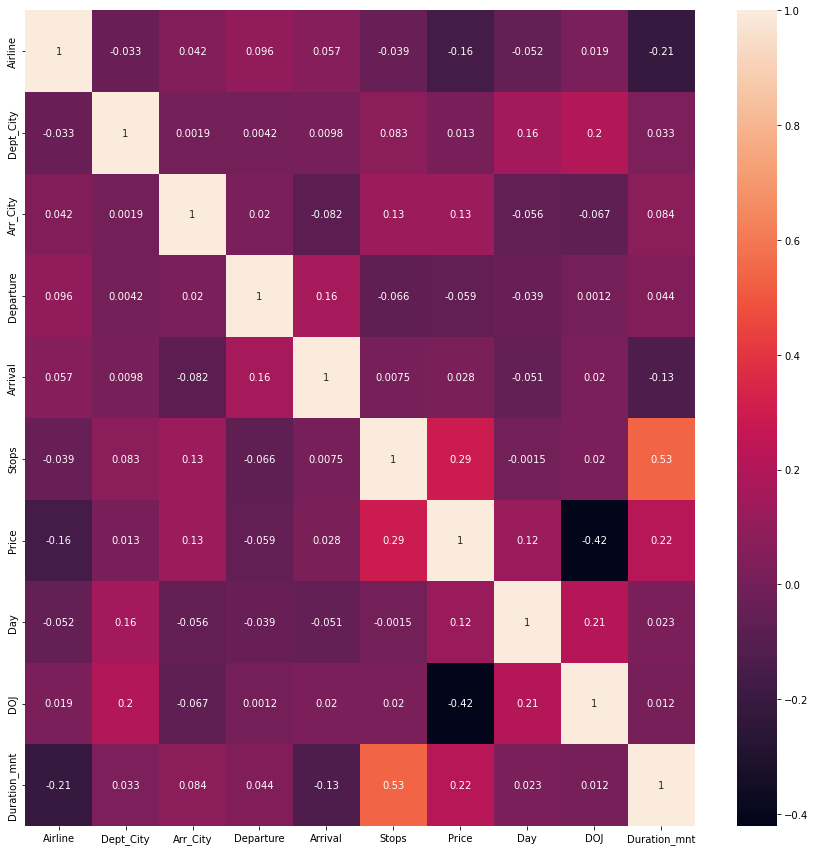

In [161]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

- Ticket price is positively correlated with Duration_amount
 
- Its also positively correlated with number of stops

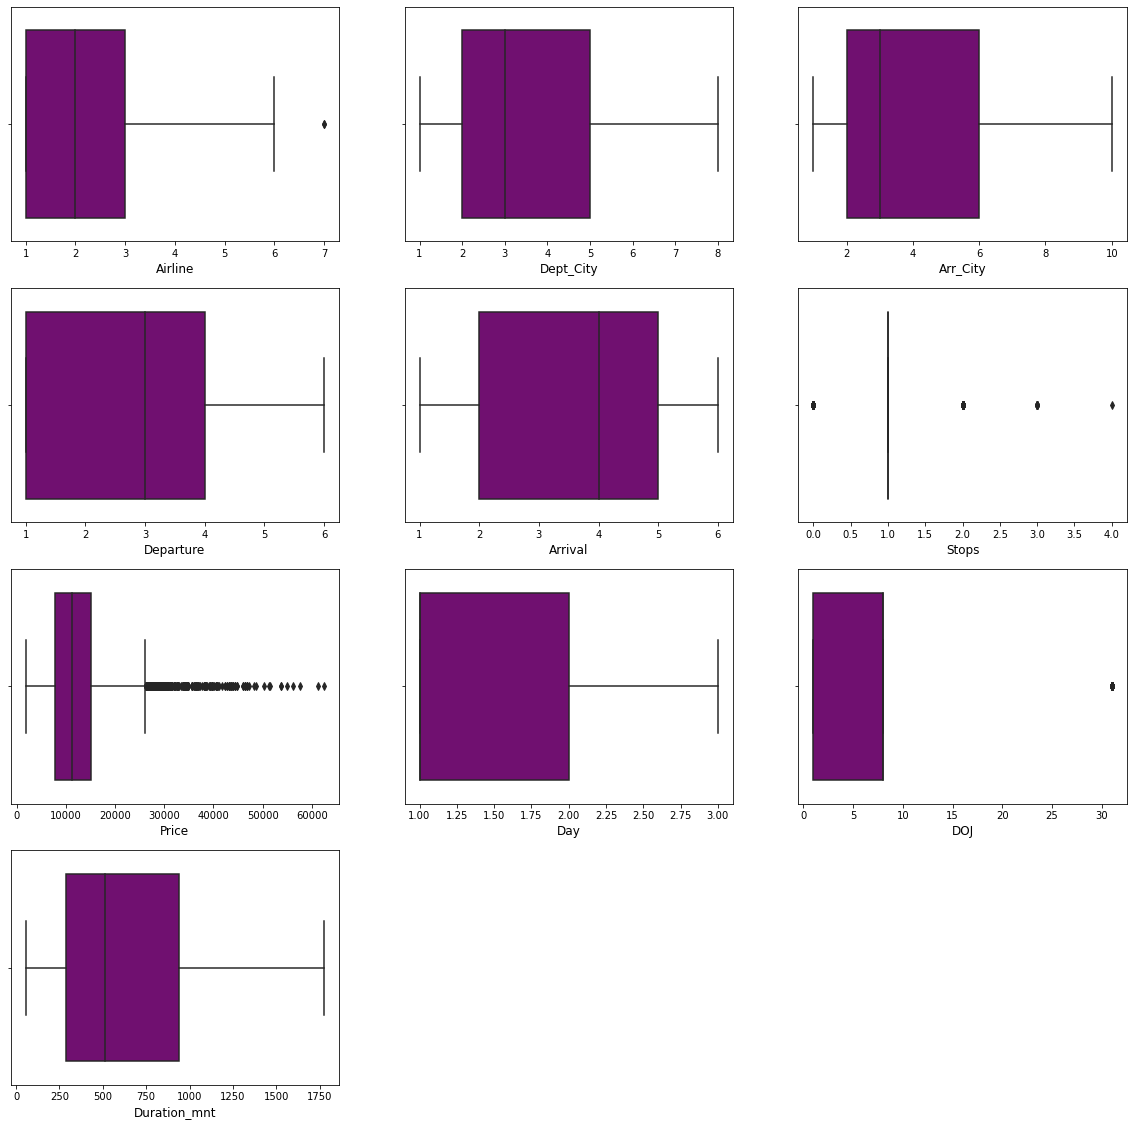

In [164]:
plt.figure(figsize=(20,25))
plotnum=1
for col in df.columns:
    if plotnum <=15:
        ax=plt.subplot(5,3,plotnum)
        sns.boxplot(df[col],color='purple')
        plt.xlabel(col,fontsize=12)
    plotnum+=1
plt.show()

There is no such outliers , we can continue

# Spliting of Features and Target

In [165]:
x=df.drop("Price",axis=1)
y=df["Price"]

# Removing the Skewness

In [166]:
x.skew()

Airline         1.043250
Dept_City       0.556853
Arr_City        0.723172
Departure       0.211199
Arrival        -0.076643
Stops          -0.307438
Day             0.768533
DOJ             2.261018
Duration_mnt    0.700308
dtype: float64

There is no such skewness

# Scaling of features

In [169]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
scaler=MinMaxScaler()
df[['Duration_mnt']]=scaler.fit_transform(df[['Duration_mnt']])

# Checking for MultiCollineariry 

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif,Features
0,3.311617,Airline
1,3.806811,Dept_City
2,3.088463,Arr_City
3,4.697100,Departure
4,5.263618,Arrival
5,5.736127,Stops
6,5.743258,Day
7,2.044623,DOJ
8,4.345003,Duration_mnt


# Finding Best Random State

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)


Maximum r2 score is  0.7199569324263427 at Random_state 157


In [194]:
df.head()

,Airline,Dept_City,Arr_City,Departure,Arrival,Stops,Price,Day,DOJ,Duration_mnt
0,4,3,2,4,1,1,7957,2,1,0.337209
1,6,3,2,2,2,0,7958,2,1,0.063953
2,6,3,2,5,6,0,7958,2,1,0.066860
3,6,3,2,5,1,1,7958,2,1,0.343023
4,6,3,2,5,2,1,7958,2,1,0.375000


In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=157)

In [184]:
!pip install xgboost

In [185]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [186]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))

print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



R2_score: 71.96322551222133
mean_squared_error: 15100757.439772462
mean_absolute_error: 2177.914209183674
root_mean_squared_error: 3885.969305047643


In [187]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))

print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



R2_score: 66.89613048102056
mean_squared_error: 17829922.059753727
mean_absolute_error: 2559.754586420854
root_mean_squared_error: 4222.54923710236


In [188]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred=ETR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



R2_score: 0.734032925886033
mean_squared_error: 14325129.57191892
mean_absolute_error: 1996.4487223402373
root_mean_squared_error: 3784.855290750086


In [189]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred=GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(

metrics.mean_squared_error(y_test,pred)))



R2_score: 0.5611305542628382
mean_squared_error: 23637744.2444141
mean_absolute_error: 3090.042222175053
root_mean_squared_error: 4861.8663334581815


In [190]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



R2_score: 0.5920617406786514
mean_squared_error: 21971773.918215614
mean_absolute_error: 2273.9176845459374
root_mean_squared_error: 4687.405883664825


In [191]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



R2_score: 0.359993866789711
mean_squared_error: 34471074.34483271
mean_absolute_error: 3709.2383430695695
root_mean_squared_error: 5871.207230615583


In [192]:
BG=BaggingRegressor()
BG.fit(x_train,y_train)
pred=BG.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



R2_score: 0.6980755333903266
mean_squared_error: 16261814.059219854
mean_absolute_error: 2258.489473800673
root_mean_squared_error: 4032.593961610796




By looking into the model r2_score and error I found ExtraTreesRegressor as the best model with highest r2_score and least errors.


# Hyper Parameter Tuning:

In [195]:
#importing necessary libraries

from sklearn.model_selection import GridSearchCV

In [196]:
parameter = {'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4],
             'n_estimators':[20,40,60,80,100],
             'min_samples_leaf':[1,2,3,4,5],
              'n_jobs':[-2,-1,1,2]}

In [197]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

In [199]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'n_jobs': [-2, -1, 1, 2]})

In [200]:
GCV.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 40,
 'n_jobs': 1}

In [202]:
final_mod=ExtraTreesRegressor(max_features='auto',min_samples_leaf=1,min_samples_split=4,n_estimators=40,n_jobs=1)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 73.42835435582815
mean_squared_error: 14311631.169381939
mean_absolute_error: 2069.271180739954
RMSE value: 3783.071657976087


# Saving the model

In [204]:
# Saving the model using .pkl
import joblib
joblib.dump(final_mod,"Flight_Price.pkl")

['Flight_Price.pkl']

# Predicting the Flight price

In [206]:
# Loading the saved model
model=joblib.load("Flight_Price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([ 9129.25833333,  7815.525     ,  9247.53333333, ...,
       12815.90833333, 13920.34583333, 29533.20416667])

In [207]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882
Predicted,9129.258333,7815.525,9247.533333,25028.091667,14483.2625,19739.0,13103.0,12312.595833,8765.6125,6397.241667,...,10895.3125,7007.7875,12882.2125,36751.675,12763.941667,18517.141667,11558.579167,12815.908333,13920.345833,29533.204167
Actual,9429.000000,9557.000,6532.000000,41087.000000,10109.0000,19459.0,13103.0,6803.000000,13629.0000,5840.000000,...,12283.0000,6371.0000,13182.0000,40509.000,12781.000000,18798.000000,11448.000000,11488.000000,11479.000000,46421.000000


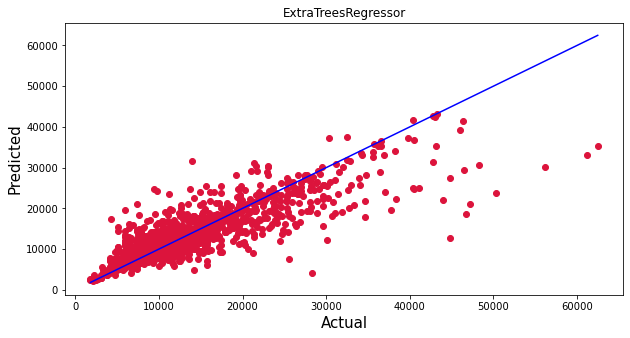

In [208]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()